### Load functions and modules

In [29]:
from numpy.linalg import inv
from scipy.stats import multivariate_normal 
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
from numpy import log
from numpy import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

### Load Data

In [30]:
%cd ~/Documents/DSE/c1steven/DSE210/MNIST
x,y = loadmnist('train-images-idx3-ubyte','train-labels-idx1-ubyte')
xtest,ytest = loadmnist('t10k-images-idx3-ubyte','t10k-labels-idx1-ubyte')

/Users/cjstev/Documents/DSE/c1steven/DSE210/MNIST


### Create Training and Validation Sets

In [104]:
import random
random.seed(50)
mask = random.sample(range(0, len(x)), 50000)
invmask = list(set(np.arange(60000))-set(mask))
xtrain = x[mask]
xvalid = x[invmask]
ytrain = y[mask]
yvalid = y[invmask]

### Create Class Probabilities (Pi)

In [105]:
class_dict = {}
for i in np.unique(ytrain):
    class_dict[i]= sum(ytrain==i)*1.0/len(ytrain)

### Create Mean Vector of Multi-variate Guassian 

In [106]:
xtrain_mu = {}
for i in np.unique(ytrain):
    xtrain_mu[i]=np.mean(xtrain[ytrain==i],axis=0)

### Create Covariate Matrix of Multi-variate Guassian 

In [107]:
xtrain_cov = {}
for i in np.unique(ytrain):
    xtrain_cov[i]=np.cov(xtrain[ytrain==i].transpose())

### Create Function to test different smoothing coefficients - c

In [111]:
##improved
def myfitter(xvalid,c):
    myeye = np.eye(784)*c
    myarray = np.empty(shape=[len(xvalid),0])

    for i in range(10):
        fit_test = log(class_dict[i])+multivariate_normal.logpdf(xvalid,mean=xtrain_mu[i],
                                                            cov = (xtrain_cov[i]+myeye))

        myarray=np.append(myarray,fit_test)
    #predlist.append(mylist.index(max(mylist)))
    myarray = np.reshape(myarray,(10,len(xvalid)))
    predlist = np.argmax(myarray,axis=0)
    return sum(predlist==yvalid)*1.0/len(yvalid)

### Create different c values and pass them through the above function

In [112]:
steps = np.arange(100,10001,100)
acc = [myfitter(xvalid,k) for k in steps]

### Plot Results

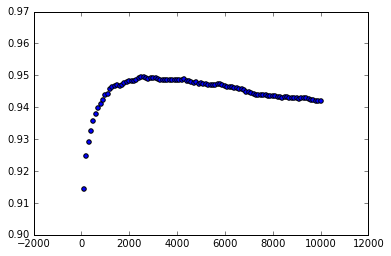

In [113]:
plt.scatter(steps,acc)

### Find C value that yields maximum accuracy

In [114]:
steps[acc.index(max(acc))]

2500

### Refit entire training set and predict the test set with c = 3400

In [119]:
class_dict = {}
for i in np.unique(y):
    class_dict[i]= sum(y==i)*1.0/len(y)

In [120]:
x_mu = {}
for i in np.unique(y):
    x_mu[i]=np.mean(x[y==i],axis=0)

In [121]:
x_cov = {}
for i in np.unique(y):
    x_cov[i]=np.cov(x[y==i].transpose())

In [143]:
myarray = np.empty(shape=[10000,0])
c=steps[acc.index(max(acc))]
myeye = np.eye(784)*c
for i in range(10):
    fit_test = log(class_dict[i])+multivariate_normal.logpdf(xtest,mean=x_mu[i],
                                                        cov = (x_cov[i]+myeye))

    myarray=np.append(myarray,fit_test)

myarray = np.reshape(myarray,(10,10000))
predlist = np.argmax(myarray,axis=0)
sum(predlist==ytest)*1.0/len(ytest),1-sum(predlist==ytest)*1.0/len(ytest)

(0.95660000000000001, 0.043399999999999994)

95.66% accuracy and 4.34% error rate!

### Refit entire training set and predict the test set with optimal C value

In [139]:
todisplay = xtest[predlist!=ytest ]

In [140]:
mymask=np.random.randint(len(todisplay),size=5)

In [141]:
todisplay = todisplay[mymask,:]

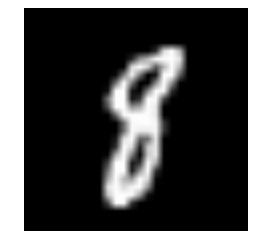

Prob of 0 is 10.14%
Prob of 1 is 9.83%
Prob of 2 is 10.07%
Prob of 3 is 10.01%
Prob of 4 is 9.97%
Prob of 5 is 10.03%
Prob of 6 is 10.12%
Prob of 7 is 10.03%
Prob of 8 is 9.85%
Prob of 9 is 9.96%


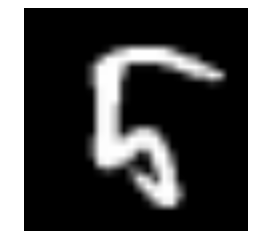

Prob of 0 is 10.04%
Prob of 1 is 10.52%
Prob of 2 is 9.98%
Prob of 3 is 9.95%
Prob of 4 is 9.92%
Prob of 5 is 9.81%
Prob of 6 is 10.02%
Prob of 7 is 10.09%
Prob of 8 is 9.79%
Prob of 9 is 9.88%


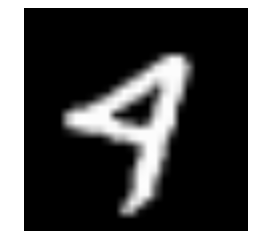

Prob of 0 is 10.14%
Prob of 1 is 10.30%
Prob of 2 is 10.04%
Prob of 3 is 9.95%
Prob of 4 is 9.78%
Prob of 5 is 9.99%
Prob of 6 is 10.26%
Prob of 7 is 9.81%
Prob of 8 is 9.96%
Prob of 9 is 9.78%


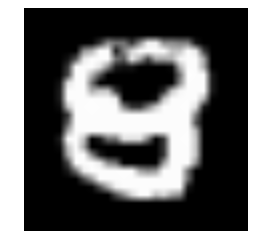

Prob of 0 is 9.75%
Prob of 1 is 11.62%
Prob of 2 is 9.64%
Prob of 3 is 9.65%
Prob of 4 is 9.85%
Prob of 5 is 9.71%
Prob of 6 is 9.86%
Prob of 7 is 10.26%
Prob of 8 is 9.71%
Prob of 9 is 9.96%


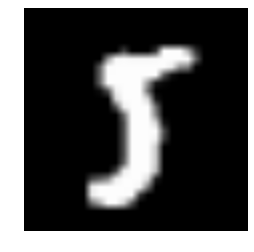

Prob of 0 is 10.10%
Prob of 1 is 9.92%
Prob of 2 is 10.01%
Prob of 3 is 9.91%
Prob of 4 is 10.05%
Prob of 5 is 9.88%
Prob of 6 is 10.25%
Prob of 7 is 10.07%
Prob of 8 is 9.85%
Prob of 9 is 9.97%


In [142]:
for i in todisplay:
    myProbList=[]
    displaychar(i)
    for k in range(10):
        myprob = log(class_dict[k])+multivariate_normal.logpdf(i,mean=x_mu[k],
                                                        cov = (x_cov[k]+myeye))
        myProbList.append(myprob)
    for k in range(10):
        myPostProb = myProbList[k]/sum(myProbList)
        #print "Prob of %s is %s"%(k,myPostProb)
        print "Prob of {0} is {1:.2f}%".format(k,myPostProb*100)